In [1]:
import scipy.io
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
%matplotlib inline

mat = scipy.io.loadmat("..\EX2\mnist_all.mat")

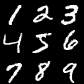

In [2]:
collage = im.new("L",(28*3,28*3))
for i in range(9):
    collage.paste(im.fromarray(np.array(mat.get(f'train{i+1}'))[0].reshape((28,28))),(28 * (i%3),28 * (i//3)))
display(collage)
# we have that each training set contains a 784 long vector that represents a handwritten digit
# the digit in the name of the training set corrosponds to the image in the figure

The number of mistakes made:  962
The success rate of the final weights: 90.38%


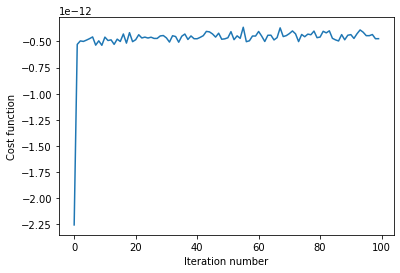

In [20]:
trainSets = [mat.get(f"train{i}") for i in range(10)]
testSets = [mat.get(f"test{i}") for i in range(10)]

N = sum([s.shape[0] for s in trainSets])
testN = sum([s.shape[0] for s in testSets])
D = 784
w = np.ones((D,10))*0.0005  # creating a uniform weights vector
# creating a small number devided by the size of the data cause it is out of the sum
Tau = 0.00001/(N)

epochCount = 100
costFunction = np.zeros(epochCount)

for _ in range(epochCount):

    updateW = np.zeros((D,10))

    for index,trainingSet in enumerate(trainSets):
        size = trainingSet.shape[0]
        Wx = np.matmul(trainingSet,w)

        expWx = np.exp(Wx)
        Yt = (expWx.T/expWx.sum(axis=1)).T
        i1 = np.zeros(10)
        i1[index] = 1
        i1 = np.tile(i1,(size,1))

        updateW += np.matmul((i1-Yt).T,trainingSet).T
        costFunction[_] += np.log(Yt.sum(axis=1)).sum()

    w+=Tau*updateW


Mistakes = 0
for index,trainingSet in enumerate(testSets):
        Wx = np.matmul(trainingSet,w)
        expWx = np.exp(Wx)
        Yt = (expWx.T/expWx.sum(axis=1)).T
        Mistakes += sum(np.argmax(Yt,axis=1) != index)

print("The number of mistakes made: ",Mistakes)
SuccessRate = (1-(Mistakes/(testN)))*100 
print(f"The success rate of the final weights: {round(SuccessRate,2)}%")

fig = plt.figure()
fig.set_facecolor("white")
plt.plot(costFunction)
plt.xlabel('Iteration number')
plt.ylabel('Cost function')

plt.show()
